In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pathlib import Path

# Load the data
df = pd.read_csv(
    Path.cwd().parent.parent / 'misc' / 'ngeso_generation_mix.csv',
    index_col=0,
    parse_dates=True
    )


Index(['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS',
       'OTHER', 'SOLAR', 'STORAGE', 'GENERATION', 'CARBON_INTENSITY',
       'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL', 'GAS_perc',
       'COAL_perc', 'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc', 'IMPORTS_perc',
       'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc', 'STORAGE_perc',
       'GENERATION_perc', 'LOW_CARBON_perc', 'ZERO_CARBON_perc',
       'RENEWABLE_perc', 'FOSSIL_perc'],
      dtype='object')
total
289.834996


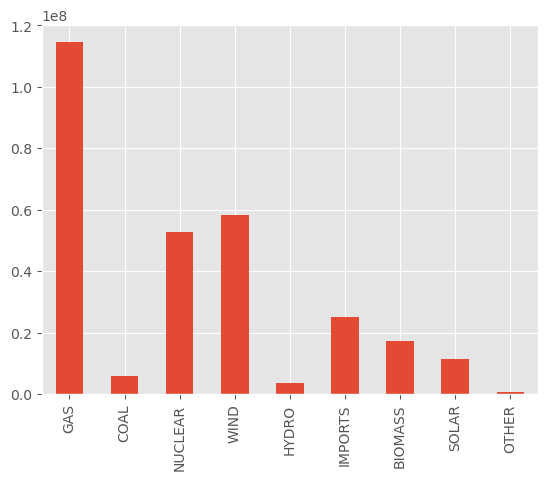

In [123]:
# Ensure the index is datetime
df_2019 = df.loc['2019'].resample('H').mean()

df_daily = df_2019.resample('D').sum()

print(df_daily.columns)

df_daily = df_daily[['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'SOLAR', 'OTHER']]

df_daily.sum().plot.bar()

print('total')
print(df_daily.sum().sum() * 1e-6)

Index(['ELEXM_SETTLEMENT_DATE', 'ELEXM_SETTLEMENT_PERIOD', 'ELEXM_localtime',
       'ELEXM_ROWFLAG', 'NGEM_ROWFLAG', 'POWER_ESPENI_MW',
       'POWER_ELEXM_CCGT_MW', 'POWER_ELEXM_OIL_MW', 'POWER_ELEXM_COAL_MW',
       'POWER_ELEXM_NUCLEAR_MW', 'POWER_ELEXM_WIND_MW', 'POWER_ELEXM_PS_MW',
       'POWER_ELEXM_NPSHYD_MW', 'POWER_ELEXM_OCGT_MW',
       'POWER_ELEXM_OTHER_POSTCALC_MW', 'POWER_ELEXM_BIOMASS_POSTCALC_MW',
       'POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW',
       'POWER_NGEM_EMBEDDED_WIND_GENERATION_MW', 'POWER_NGEM_BRITNED_FLOW_MW',
       'POWER_NGEM_EAST_WEST_FLOW_MW', 'POWER_NGEM_FRENCH_FLOW_MW',
       'POWER_NGEM_MOYLE_FLOW_MW', 'POWER_NGEM_NEMO_FLOW_MW'],
      dtype='object')
                              CCGT  OCGT  OIL     COAL  NUCLEAR  WIND  NPSHYD  \
ELEXM_utc                                                                       
2008-11-05 21:00:00+00:00  16468.0   0.0  0.0  19525.0   5646.0  62.0   314.0   
2008-11-05 21:30:00+00:00  15240.0   0.0  0.0  18892.0  

266.64935249999996

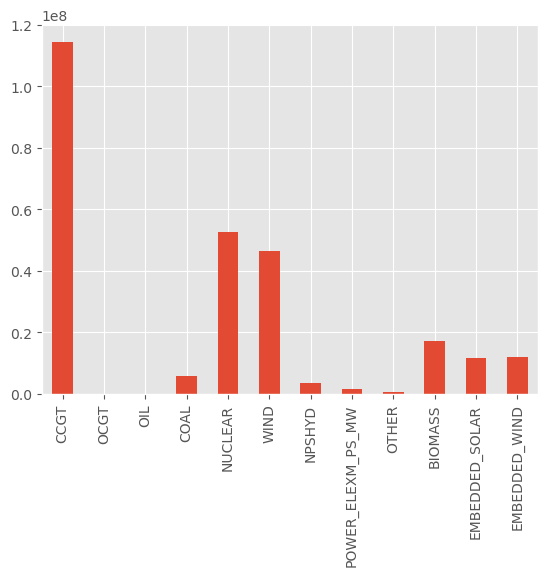

In [124]:
espeni = pd.read_csv(Path.cwd().parent / 'data' / 'espeni.csv', index_col=2, parse_dates=True)

print(espeni.columns)
cols = [
    'POWER_ELEXM_CCGT_MW',
    'POWER_ELEXM_OCGT_MW',
    'POWER_ELEXM_OIL_MW',
    'POWER_ELEXM_COAL_MW',
    'POWER_ELEXM_NUCLEAR_MW',
    'POWER_ELEXM_WIND_MW',
    'POWER_ELEXM_NPSHYD_MW',
    'POWER_ELEXM_PS_MW',
    # 'POWER_ELEXM_SOLAR_MW',
    'POWER_ELEXM_OTHER_POSTCALC_MW',
    'POWER_ELEXM_BIOMASS_POSTCALC_MW',
    'POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW',
    'POWER_NGEM_EMBEDDED_WIND_GENERATION_MW',
]

rename_dict = {
    'POWER_ELEXM_CCGT_MW': 'CCGT',
    'POWER_ELEXM_OCGT_MW': 'OCGT',
    'POWER_ELEXM_OIL_MW': 'OIL',
    'POWER_ELEXM_COAL_MW': 'COAL',
    'POWER_ELEXM_NUCLEAR_MW': 'NUCLEAR',
    'POWER_ELEXM_WIND_MW': 'WIND',
    'POWER_ELEXM_NPSHYD_MW': 'NPSHYD',
    'POWER_ELEXM_BIOFUEL_MW': 'BIOFUEL',
    'POWER_ELEXM_BIOMASS_POSTCALC_MW': 'BIOMASS',
    # 'POWER_ELEXM_SOLAR_MW': 'SOLAR',
    'POWER_ELEXM_OTHER_POSTCALC_MW': 'OTHER',
    'POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW': 'EMBEDDED_SOLAR',
    'POWER_NGEM_EMBEDDED_WIND_GENERATION_MW': 'EMBEDDED_WIND',
}

generation = espeni[cols].rename(columns=rename_dict)
print(generation.head())
generation = generation.loc['2019'].resample('H').mean()

generation.sum().plot.bar()
generation.sum().sum() * 1e-6

In [125]:
espeni.loc['2019', 'POWER_ESPENI_MW'].mul(1e-6).resample('h').mean().sum()

287.8783185

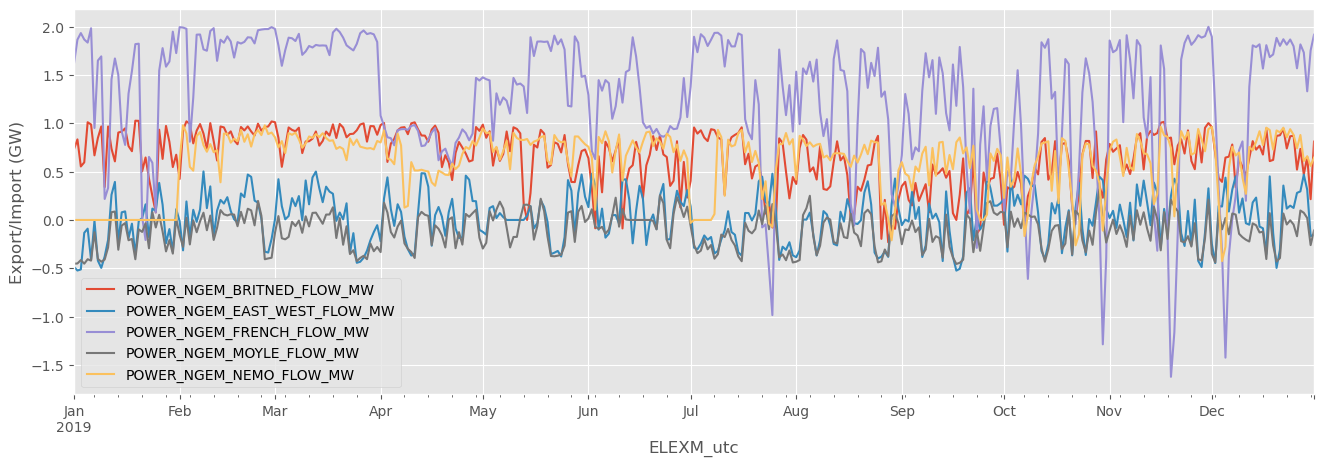

POWER_NGEM_BRITNED_FLOW_MW      11.390418
POWER_NGEM_EAST_WEST_FLOW_MW     0.360070
POWER_NGEM_FRENCH_FLOW_MW       22.292384
POWER_NGEM_MOYLE_FLOW_MW        -1.961251
POWER_NGEM_NEMO_FLOW_MW         10.376311
dtype: float64

In [126]:
inter = espeni.loc['2019', espeni.columns.str.contains('FLOW')]

fig, ax = plt.subplots(figsize=(16, 5))
inter.resample('d').mean().mul(1e-3).plot(ax=ax)
ax.set_ylabel('Export/Import (GW)')
plt.show()

inter.sum().mul(1e-6)

In [127]:
generation.sum().sum()

266649352.5

In [128]:
mapper = {
    'POWER_NGEM_BRITNED_FLOW_MW': 'BRITNED',
    'POWER_NGEM_EAST_WEST_FLOW_MW': 'EAST_WEST',
    'POWER_NGEM_FRENCH_FLOW_MW': 'FRENCH_FLOW',
    'POWER_NGEM_MOYLE_FLOW_MW': 'MOYLE',
}

inter.rename(columns=mapper).sum().mul(1e-6)

BRITNED                    11.390418
EAST_WEST                   0.360070
FRENCH_FLOW                22.292384
MOYLE                      -1.961251
POWER_NGEM_NEMO_FLOW_MW    10.376311
dtype: float64

In [129]:
inter.resample('h').mean().sum().sum() + generation.sum().sum()

287878318.5

In [130]:
import pandas as pd


(14, 28)


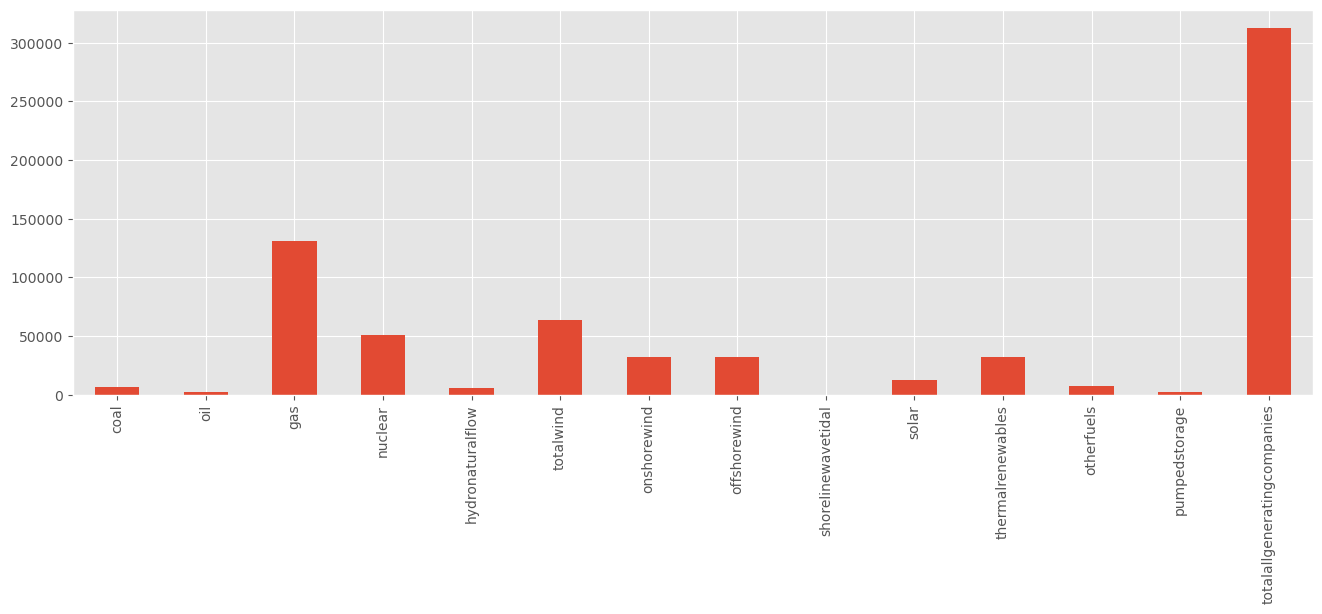

In [131]:
df = pd.read_excel(
    Path.cwd().parent / 'data' / 'DUKES_5.6.xlsx',
    sheet_name='5.6',
    index_col=1,
    header=161,
).iloc[:40]

df = df.loc[df[df.columns[0]] == 'All generating companies']
print(df.shape)
df = df.loc[df.index.dropna(), '2019']


def clean_string(strings):

    return [
        ''
        .join(filter(str.isalpha, s))
        .lower()
        .replace('note', '')
        for s in strings
        ]


df.index = clean_string(df.index)

fig, ax = plt.subplots(figsize=(16, 5))
df.plot.bar(ax=ax)
plt.show()

df = df.groupby(df.index).sum().mul(1e-3)

(0.0, 145.0)

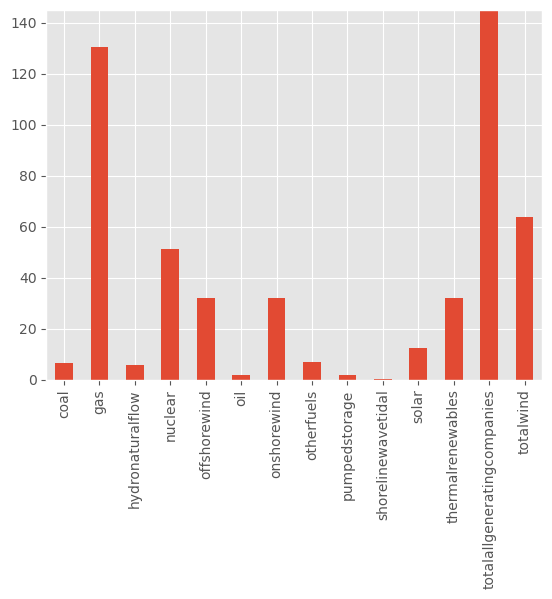

In [132]:
df.plot.bar()
plt.ylim(0, 145)

In [133]:
df.loc['wind'] = df.loc['totalwind']



In [134]:
generation.mul(1e-6).sum()

CCGT                 114.445495
OCGT                   0.069576
OIL                    0.000058
COAL                   5.935353
NUCLEAR               52.763603
WIND                  46.459567
NPSHYD                 3.576265
POWER_ELEXM_PS_MW      1.685995
OTHER                  0.775673
BIOMASS               17.208448
EMBEDDED_SOLAR        11.664317
EMBEDDED_WIND         12.065003
dtype: float64

In [135]:
generation = generation.sum().mul(1e-6)

In [136]:
eso = df_daily.copy().drop(columns=['IMPORTS', 'OTHER']).sum().mul(1e-6)
eso.index = [col.lower() for col in eso.index]
eso

gas        114.548059
coal         5.936727
nuclear     52.766713
wind        58.436257
hydro        3.574307
biomass     17.202939
solar       11.484326
dtype: float64

In [137]:
carriers = ['gas', 'solar', 'wind', 'coal', 'hydro', 'biomass', 'nuclear', 'oil']

espeni_clean = pd.Series(0, index=carriers, name='espeni')
espeni_clean.loc['gas'] = generation.loc['CCGT'] + generation.loc['OCGT']
espeni_clean.loc['solar'] = generation.loc['EMBEDDED_SOLAR']
espeni_clean.loc['wind'] = generation.loc['WIND'] + generation.loc['EMBEDDED_WIND']
espeni_clean.loc['coal'] = generation.loc['COAL']
espeni_clean.loc['hydro'] = generation.loc['NPSHYD']
espeni_clean.loc['biomass'] = generation.loc['BIOMASS']
espeni_clean.loc['nuclear'] = generation.loc['NUCLEAR']
espeni_clean.loc['oil'] = generation.loc['OIL']

beis_clean = pd.Series(0, index=carriers, name='beis')
beis_clean.loc['gas'] = df.loc['gas']

beis_clean.loc[beis_clean.index.intersection(df.index)] = df.loc[beis_clean.index.intersection(df.index)]

beis_clean.loc['wind'] = df.loc['onshorewind'] + df.loc['offshorewind']
beis_clean.loc['biomass'] = df.loc['thermalrenewables']
beis_clean.loc['hydro'] = df.loc['pumpedstorage'] + df.loc['hydronaturalflow']

beis_clean.sum()
total = (df := pd.concat((
    beis_clean,
    espeni_clean,
    eso.rename('eso')
    ), axis=1
)).divide(df.sum())


In [141]:
beis_clean.sum()

305.6790101

Text(0, 0.5, 'Generation 2019 [TWh]')

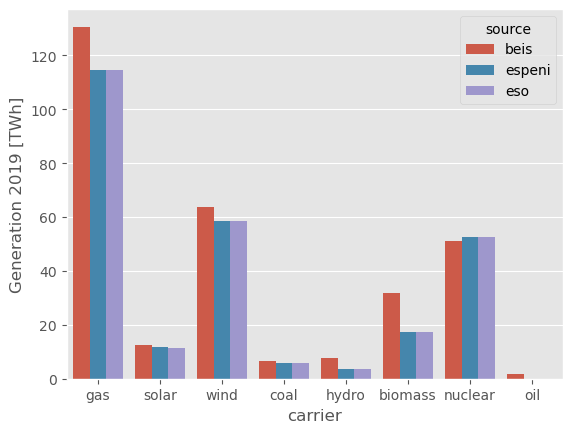

In [138]:
import seaborn as sns

# total = df.divide(df.sum()).stack().reset_index().rename(columns={'level_0': 'carrier', 'level_1': 'source', 0: 'value'})
total = df.stack().reset_index().rename(columns={'level_0': 'carrier', 'level_1': 'source', 0: 'value'})

sns.barplot(total, x='carrier', y='value', hue='source')
plt.ylabel("Generation 2019 [TWh]")

,gas,coal,nuclear,wind,hydro,biomass,solar
DATETIME,,,,,,,
2019-01-01 00:00:00+00:00,279089.0,14819.0,157804.5,183511.0,12082.0,27874.5,8814.5
2019-01-02 00:00:00+00:00,491432.0,65793.5,143334.0,65981.0,13312.5,48995.5,7233.0
2019-01-03 00:00:00+00:00,537242.5,96854.5,140359.5,44749.5,12045.0,53010.0,5069.0
2019-01-04 00:00:00+00:00,534930.5,67354.0,146371.5,74492.0,10003.0,53316.5,9142.5
2019-01-05 00:00:00+00:00,485940.5,33828.0,147244.5,85164.5,10708.0,37809.5,1491.5
...,...,...,...,...,...,...,...
2019-12-27 00:00:00+00:00,243271.5,14579.0,159661.5,195598.5,17068.0,51714.0,2027.0
2019-12-28 00:00:00+00:00,170942.5,14472.0,158393.0,257184.5,13484.0,55499.0,3849.0
2019-12-29 00:00:00+00:00,147984.5,11791.5,158264.5,267780.0,15696.0,58042.5,7645.5
